In [1]:
#!pip install tensorflow

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import samplerate
from scipy.io import wavfile

# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
# import graphviz


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from IPython.display import display, Math, Markdown
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.signal import butter,filtfilt

In [3]:
dataset = pd.read_csv("Swiperight1.csv", header = 0)

t = dataset.loc[:,"seconds_elapsed"]
X = dataset.loc[:,"accelerationX"]
Y = dataset.loc[:,"accelerationY"]
Z = dataset.loc[:,"accelerationZ"]

Rx = dataset.loc[:,"rotationRateX"]
Ry = dataset.loc[:,"rotationRateY"]
Rz = dataset.loc[:,"rotationRateZ"]

print("t has dimensions {}".format(t.shape))
print("X has dimensions {}".format(X.shape))
print("Y has dimensions {}".format(Y.shape))
print("Z has dimensions {}".format(Z.shape))

print("Rx has dimensions {}".format(Rx.shape))
print("Ry has dimensions {}".format(Ry.shape))
print("Rz has dimensions {}".format(Rz.shape))

t has dimensions (304,)
X has dimensions (304,)
Y has dimensions (304,)
Z has dimensions (304,)
Rx has dimensions (304,)
Ry has dimensions (304,)
Rz has dimensions (304,)


In [4]:
X = np.reshape(X,(-1,1))
Y = np.reshape(Y,(-1,1))
Z = np.reshape(Z,(-1,1))
t = np.reshape(t,(-1,1))

Rx = np.reshape(Rx,(-1,1))
Ry = np.reshape(Ry,(-1,1))
Rz = np.reshape(Rz,(-1,1))

print("t has dimensions {}".format(t.shape))
print("X has dimensions {}".format(X.shape))
print("Y has dimensions {}".format(Y.shape))
print("Z has dimensions {}".format(Z.shape))

print("Rx has dimensions {}".format(Rx.shape))
print("Ry has dimensions {}".format(Ry.shape))
print("Rz has dimensions {}".format(Rz.shape))

t has dimensions (304, 1)
X has dimensions (304, 1)
Y has dimensions (304, 1)
Z has dimensions (304, 1)
Rx has dimensions (304, 1)
Ry has dimensions (304, 1)
Rz has dimensions (304, 1)


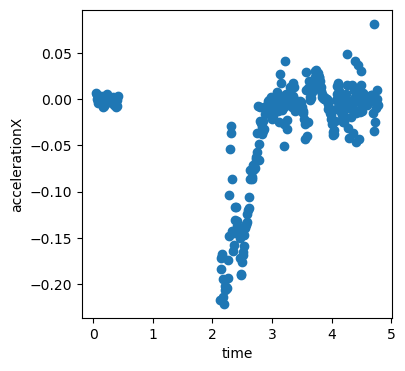

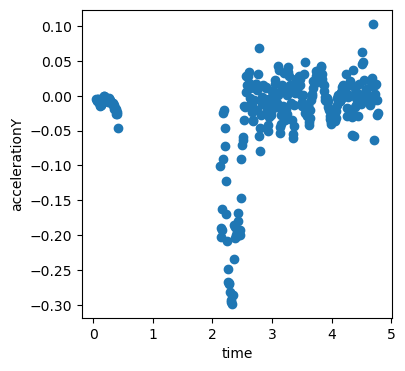

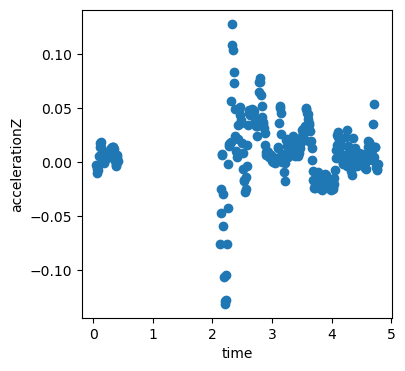

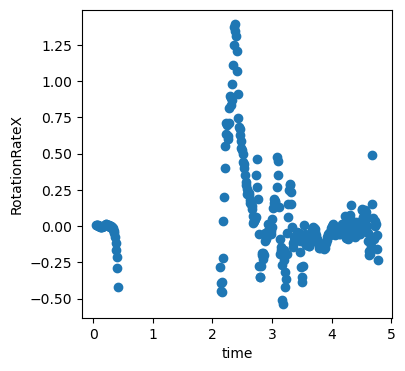

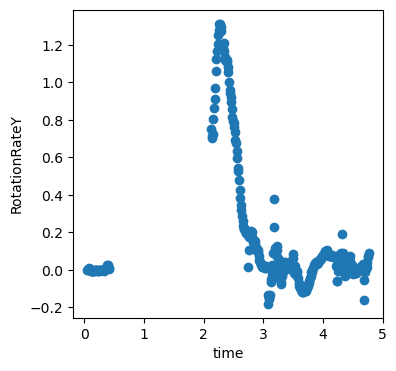

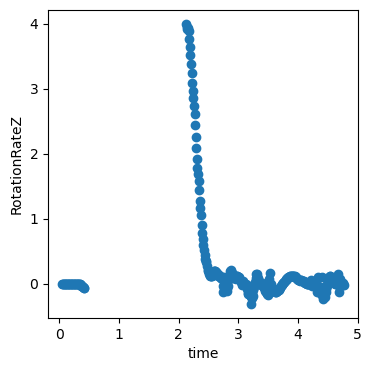

In [5]:
fig = plt.figure(figsize=(4,4))
plt.scatter(t, X)
plt.xlabel('time')
plt.ylabel('accelerationX')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(t, Y)
plt.xlabel('time')
plt.ylabel('accelerationY')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(t, Z)
plt.xlabel('time')
plt.ylabel('accelerationZ')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(t, Rx)
plt.xlabel('time')
plt.ylabel('RotationRateX')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(t, Ry)
plt.xlabel('time')
plt.ylabel('RotationRateY')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(t, Rz)
plt.xlabel('time')
plt.ylabel('RotationRateZ')
plt.show()

In [6]:
# Trim the data

flat = 0
for k in range(len(t)):
    if (np.sqrt(math.pow(X[k], 2) + math.pow(Y[k], 2) + math.pow(Z[k], 2))) < 0.0025:
        flat = flat + 1
tt = t[flat:]
Xt = X[flat:]
Yt = Y[flat:]
Zt = Z[flat:]

flat = 0
for k in range(len(t)):
    if (np.sqrt(math.pow(X[len(t)-k-1], 2) + math.pow(Y[len(t)-k-1], 2) + math.pow(Z[len(t)-k-1], 2))) < 0.05:
        flat = flat + 1
tt = tt[:len(t)-flat]
Xt = Xt[:len(t)-flat]
Yt = Yt[:len(t)-flat]
Zt = Zt[:len(t)-flat]

print("tt has dimensions {}".format(tt.shape))
print("Xt has dimensions {}".format(Xt.shape))
print("Yt has dimensions {}".format(Yt.shape))
print("Zt has dimensions {}".format(Zt.shape))

#-----------------------------------------------------------------------------------------------------------

# def low_pass_filter(adata: np.ndarray, bandlimit: int = 5000 , sampling_rate: int = 44100) -> np.ndarray:
#         # translate bandlimit from Hz to dataindex according to sampling rate and data size
#     bandlimit_index = int(bandlimit * adata.size / sampling_rate)
    
#     fsig = np.fft.fft(adata)
        
#     for i in range(bandlimit_index + 1, len(fsig)):
#         fsig[i] = 0
            
#     adata_filtered = np.fft.ifft(fsig)
    
#     return np.real(adata_filtered)



# #-----------------------------------------------------------------------------------

# def butter_lowpass_filter(data, cutoff, fs, order):
#     normal_cutoff = cutoff / nyq
#     # Get the filter coefficients 
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     y = filtfilt(b, a, data)
#     return y

# data = Xt;

# # Filter requirements.
# T = 5.0         # Sample Period
# fs = 30.0       # sample rate, Hz
# cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
# nyq = 0.5 * fs  # Nyquist Frequency
# order = 2       # sin wave can be approx represented as quadratic
# n = int(T * fs) # total number of samples


# # Filter the data, and plot both the original and filtered signals.
# y = butter_lowpass_filter(data, cutoff, fs, order)
# fig = go.Figure()
# fig.add_trace(go.Scatter(
#             y = data,
#             line =  dict(shape =  'spline' ),
#             name = 'signal with noise'
#             ))
# fig.add_trace(go.Scatter(
#             y = y,
#             line =  dict(shape =  'spline' ),
#             name = 'filtered signal'
#             ))
# fig.show()

#-------------------------------------------------------------------------------------

# Xt = low_pass_filter(Xt)
# Yt = low_pass_filter(Yt)
# Zt = low_pass_filter(Zt)

# X = preprocessing.normalize(X,axis=0)
# Y = preprocessing.normalize(Y,axis=0)
# Z = preprocessing.normalize(Z,axis=0)

# scalar = MinMaxScaler(feature_range=(0,1))
# Xt = scalar.fit_transform(Xt)
# Yt = scalar.fit_transform(Yt)
# Zt = scalar.fit_transform(Zt)

tt has dimensions (95, 1)
Xt has dimensions (95, 1)
Yt has dimensions (95, 1)
Zt has dimensions (95, 1)


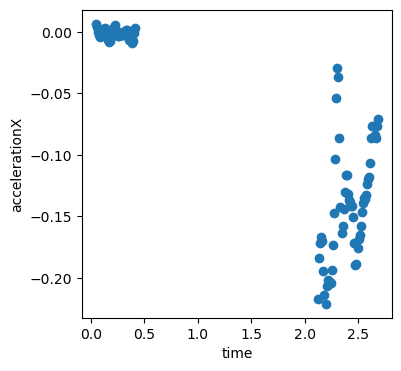

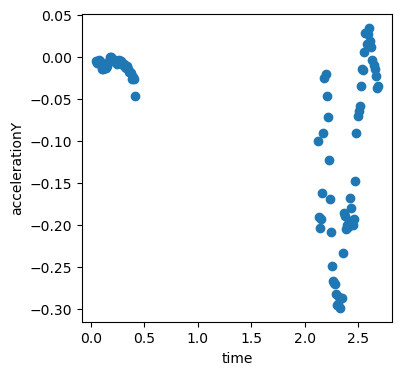

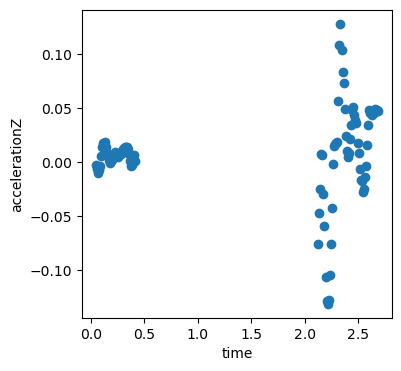

In [7]:
fig = plt.figure(figsize=(4,4))
plt.scatter(tt, Xt)
plt.xlabel('time')
plt.ylabel('accelerationX')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(tt, Yt)
plt.xlabel('time')
plt.ylabel('accelerationY')
plt.show()

fig = plt.figure(figsize=(4,4))
plt.scatter(tt, Zt)
plt.xlabel('time')
plt.ylabel('accelerationZ')
plt.show()

In [8]:
#Normalise the data to be an array of length 1000

tr = samplerate.resample(tt,1001/tt.shape[0], 'linear')  
Xr = samplerate.resample(Xt,1001/Xt.shape[0], 'sinc_best')  
Yr = samplerate.resample(Yt,1001/Yt.shape[0], 'sinc_best')  
Zr = samplerate.resample(Zt,1001/Zt.shape[0], 'sinc_best')  


#Trim function to eliminate any possible rounding errors that cause 1001 after resampling
tr = tr[0:1000]
Xr = Xr[0:1000]
Yr = Yr[0:1000]
Zr = Zr[0:1000]

#Trim function to deaden ends
t1 = 200;
t2 = 800;
tr = tr[t1:t2]
Xr = Xr[t1:t2]
Yr = Yr[t1:t2]
Zr = Zr[t1:t2]

print("tt has dimensions {}".format(tr.shape))
print("Xr has dimensions {}".format(Xr.shape))
print("Yt has dimensions {}".format(Yr.shape))
print("Zt has dimensions {}".format(Zr.shape))

scalar = MinMaxScaler(feature_range=(0,1))
Xr = scalar.fit_transform(Xr)
Yr = scalar.fit_transform(Yr)
Zr = scalar.fit_transform(Zr)

tt has dimensions (600, 1)
Xr has dimensions (600, 1)
Yt has dimensions (600, 1)
Zt has dimensions (600, 1)


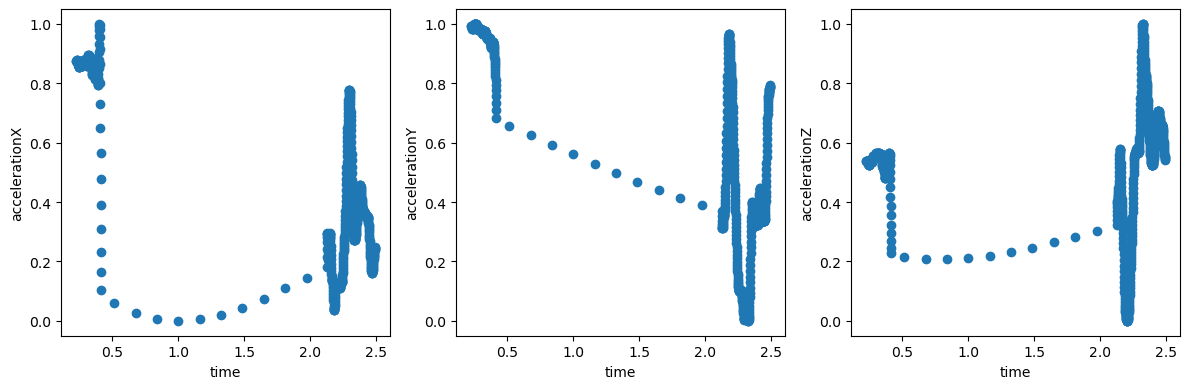

In [9]:
# Data lists
data = [Xr, Yr, Zr]
labels = ['accelerationX', 'accelerationY', 'accelerationZ']

# Create a figure with 1 row and 3 columns for subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Loop through each dataset and label to create scatter plots in subplots
for i in range(3):
    axs[i].scatter(tr, data[i])
    axs[i].set_xlabel('time')
    axs[i].set_ylabel(labels[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


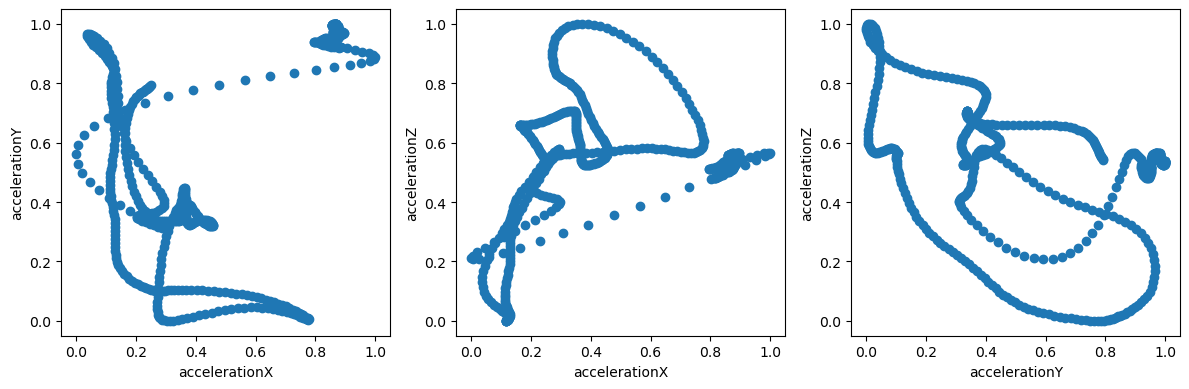

In [10]:
# Create a figure with 1 row and 3 columns for subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot accelerationX vs accelerationY
axs[0].scatter(Xr, Yr)
axs[0].set_xlabel('accelerationX')
axs[0].set_ylabel('accelerationY')

# Plot accelerationX vs accelerationZ
axs[1].scatter(Xr, Zr)
axs[1].set_xlabel('accelerationX')
axs[1].set_ylabel('accelerationZ')

# Plot accelerationY vs accelerationZ
axs[2].scatter(Yr, Zr)
axs[2].set_xlabel('accelerationY')
axs[2].set_ylabel('accelerationZ')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [13]:
def TSreg(i,Xr,tr):
    fig, axes = plt.subplots(1, 3,figsize=(15,8), sharey=True)
    coefs = {}

    degree = 30;
    axes[i].plot(tr, Xr, color='slategrey', linestyle='--', label='Xr_true')

    # Generate polynomial features from training data
    poly = make_pipeline(StandardScaler(with_mean=False), PolynomialFeatures(degree=degree, include_bias=False))
    X_poly = poly.fit_transform(tr)

    # Define linear model with no regularization
    poly_reg = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
    
    # Fit linear model to training data
    poly_reg.fit(X_poly, Xr)
    
    coefs['{}'.format(degree)] = poly_reg.named_steps['linearregression'].coef_
    
    # Predict on X to generate curve
    y_hat_poly = poly_reg.predict(poly.transform(tr))
    
    axes[i].plot(tr,y_hat_poly, color='g', label='Degree = {}'.format(degree))
    
    axes[i].set_xlabel('tr')
    axes[i].set_ylim(-1, 1)
    
    axes[i].legend(loc='upper center')
    
    axes[i].set_ylabel('Xr')  
    plt.show()

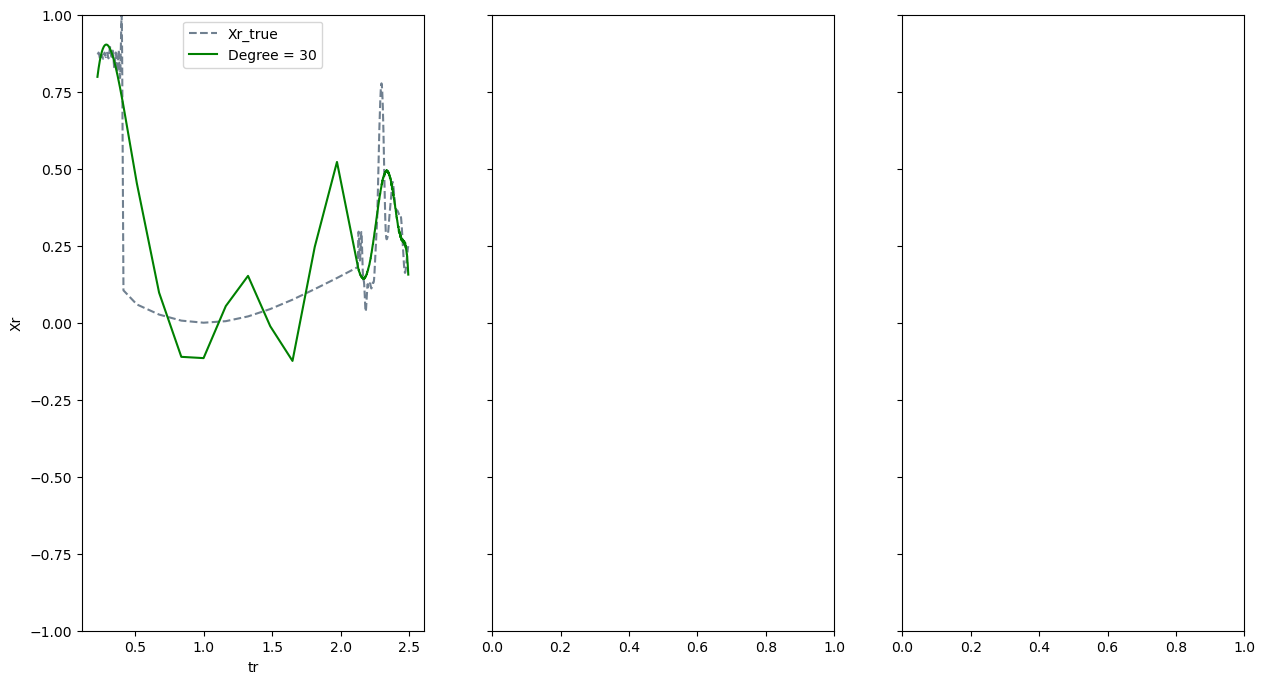

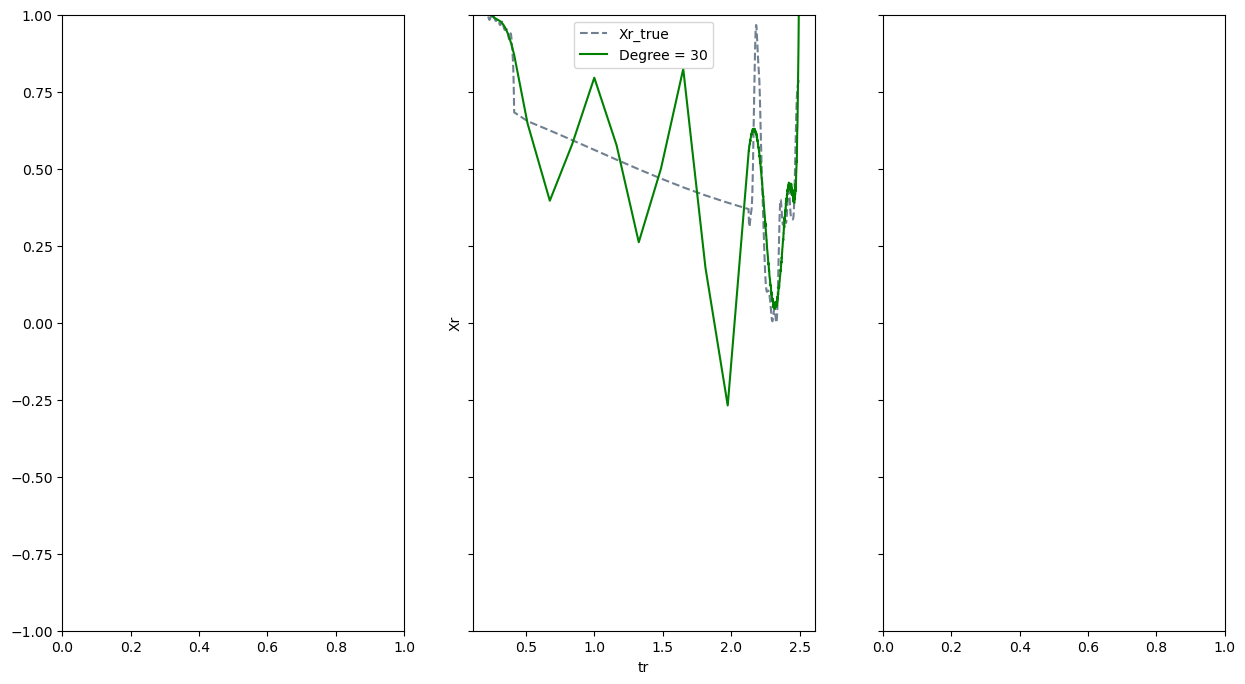

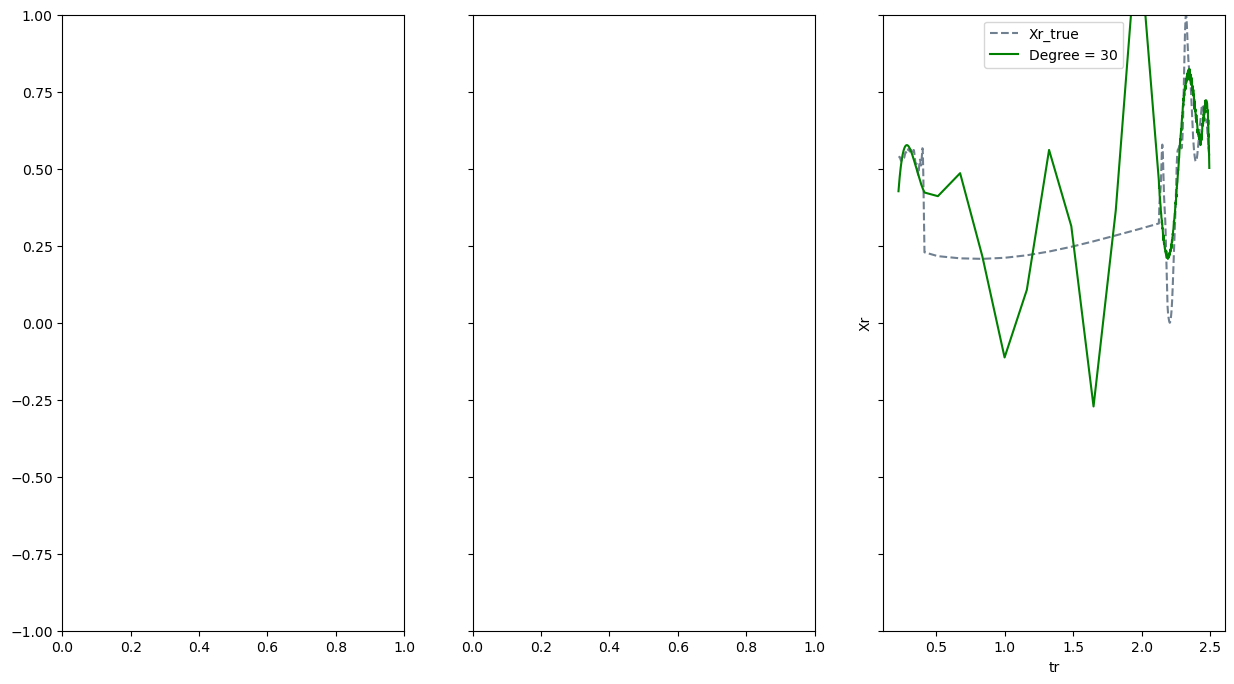

In [14]:
TSreg(0,Xr,tr);
TSreg(1,Yr,tr)
TSreg(2,Zr,tr)

In [ ]:
#Trying a Long Short-Term Memory neural network
trainX = tr;
testX = tr;
trainY = Xr;
testY = Xr;

scalar = MinMaxScaler(feature_range=(0,1))
trainY = scalar.fit_transform(trainY)
testY = scalar.fit_transform(testY)

# create and fit the LSTM network
look_back = 1
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2);

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

fig = plt.figure(figsize=(4,4))
plt.scatter(tr, trainPredict)
plt.xlabel('tr')
plt.ylabel('Xr_Predicted')
plt.show()

fig, axes = plt.subplots(1, 3,figsize=(15,8), sharey=True)
axes[0].plot(tr, Xr, color='slategrey', linestyle='--', label='Xr_true')
axes[0].plot(tr,(trainPredict), color='g', label='Xr_Predicted')
axes[0].legend(loc='upper center')
axes[0].set_ylabel('tr')  
axes[0].set_ylim(0, 1)
plt.show()

In [ ]:
#Prediction Pipeline
#Trying a Long Short-Term Memory neural network
def LSTM_pred(trainX,testX,trainY,testY):

    scalar = MinMaxScaler(feature_range=(0,1))
    trainY = scalar.fit_transform(trainY)
    testY = scalar.fit_transform(testY)

    # create and fit the LSTM network
    look_back = 1
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2);

    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    # trainPredict = scaler.inverse_transform(trainPredict)
    # trainY = scaler.inverse_transform([trainY])
    # testPredict = scaler.inverse_transform(testPredict)
    # testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = np.sqrt(mean_squared_error(testY, testPredict))
    print('Test Score: %.2f RMSE' % (testScore))

    fig = plt.figure(figsize=(4,4))
    plt.scatter(tr, trainPredict)
    plt.xlabel('tr')
    plt.ylabel('Xr_Predicted')
    plt.show()

    fig, axes = plt.subplots(1, 3,figsize=(15,8), sharey=True)
    axes[0].plot(tr, Xr, color='slategrey', linestyle='--', label='Xr_true')
    axes[0].plot(tr,(trainPredict), color='g', label='Xr_Predicted')
    axes[0].legend(loc='upper center')
    axes[0].set_ylabel('tr')  
    axes[0].set_ylim(0, 1)
    plt.show()

In [ ]:
LSTM_pred(tr,tr,Xr,Xr);
LSTM_pred(tr,tr,Yr,Yr);
LSTM_pred(tr,tr,Zr,Zr);

In [ ]:
#Switching to Convolutional Neural Network (CNN)
